# Colorado Demographic Segementation

A government or marketing company wants to segment the population of Colorado. By using the clustering techinques, this would benefit what's the similarty based on the US Census data of 2017 for Colorado. Each row in this data represents a census tract, which is more or less the equivalent of a neighborhood.

# Load and Clean the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", context="talk")
from sklearn.manifold import TSNE
pd.set_option('display.max_columns', 500)
import time
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm

from scipy.stats import pointbiserialr
import scipy.stats as stats
import scipy.stats as ss
from scipy.stats.mstats import winsorize

from hyperopt import hp, tpe, fmin, Trials, STATUS_OK, space_eval

import time
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import umap
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


import warnings
%matplotlib inline

In [2]:
df = pd.read_csv('acs2017_census_tract_data.csv')

In [3]:
colorado = df.loc[df['State']== 'Colorado'].drop(columns=['State'], axis=1)

In [4]:
colorado.head()

,TractId,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
11617,8001007801,Adams County,4412,2204,2208,44.5,11.1,15.1,0.0,25.2,0.0,1361,24420.0,4644.0,12138.0,1887.0,44.1,56.0,3.1,38.5,15.8,21.9,20.7,43.0,24.0,20.0,8.1,2.7,2.2,28.4,1861,91.9,3.3,4.8,0.0,9.8
11618,8001007802,Adams County,4594,2095,2499,58.5,11.0,19.2,1.4,5.6,0.0,1487,28341.0,5089.0,11595.0,1427.0,37.2,48.8,4.6,36.6,12.6,30.9,15.3,55.2,19.7,21.2,2.2,0.8,1.0,29.2,1862,90.4,4.4,4.6,0.5,12.0
11619,8001007900,Adams County,5589,2919,2670,57.8,19.8,13.7,1.7,2.4,0.0,2537,38297.0,3424.0,16182.0,1657.0,23.6,34.6,13.6,26.4,19.6,24.5,15.8,66.9,17.1,9.5,2.9,1.3,2.3,29.4,2690,90.9,4.6,4.2,0.3,7.7
11620,8001008000,Adams County,6412,3295,3117,54.7,24.8,14.9,0.9,3.1,0.0,3120,52219.0,3066.0,20396.0,3851.0,18.5,23.6,14.6,30.8,22.0,15.7,16.8,65.1,20.0,9.8,1.0,1.4,2.6,33.5,3057,89.0,9.2,1.8,0.0,6.5
11621,8001008100,Adams County,1563,715,848,22.6,60.7,2.5,0.0,8.2,0.0,1273,39156.0,6527.0,28549.0,3309.0,31.1,19.4,55.5,8.3,15.2,16.1,4.9,51.9,15.7,1.5,23.0,3.0,5.0,20.6,735,75.9,19.5,4.6,0.0,2.1


In [5]:
colorado.columns

Index(['TractId', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [6]:
#Dropping some columns
#Use poverty instead of child poverty
# drop TractId	 and county so the data can be more general
# drop employed and use unemployment instead
# Drop income and and incomeerr for IncomePerCap
drop_cols_for_analysis = ['ChildPoverty','TractId','County','Income','IncomeErr','IncomePerCapErr', 'Employed']
co_dropped = colorado.drop(columns=drop_cols_for_analysis, axis=1)

In [7]:
co_dropped.isnull().sum()*100/co_dropped.isnull().count()

TotalPop            0.000000
Men                 0.000000
Women               0.000000
Hispanic            0.560448
White               0.560448
Black               0.560448
Native              0.560448
Asian               0.560448
Pacific             0.560448
VotingAgeCitizen    0.000000
IncomePerCap        0.560448
Poverty             1.040833
Professional        0.960769
Service             0.960769
Office              0.960769
Construction        0.960769
Production          0.960769
Drive               0.960769
Carpool             0.960769
Transit             0.960769
Walk                0.960769
OtherTransp         0.960769
WorkAtHome          0.960769
MeanCommute         1.040833
PrivateWork         0.960769
PublicWork          0.960769
SelfEmployed        0.960769
FamilyWork          0.960769
Unemployment        0.960769
dtype: float64

In [8]:
#Drop rows that has nulls since the nulls are one percent or lower. 
co_clean = co_dropped.dropna()

In [9]:
co_clean.shape

(1234, 29)

In [10]:
co_dropped.shape

(1249, 29)

In [11]:
co_clean.describe()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,IncomePerCap,Poverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.00000,1234.000000,1234.000000,1234.000000
mean,4390.321718,2200.665316,2189.656402,21.080632,69.531929,3.438574,0.574554,2.780713,0.128120,3140.559968,35016.239060,12.157618,40.297407,17.704862,22.952026,9.807293,9.241491,75.026337,9.360616,3.045543,2.912156,2.269125,7.388493,24.856321,79.133063,13.98201,6.682334,0.200000,5.486629
std,2000.920335,1019.317645,1008.277921,17.824638,20.235153,5.987042,2.654861,3.324924,0.588656,1389.656682,14955.554048,9.823668,14.437552,7.275941,5.040372,6.148663,4.998632,9.453844,5.026027,3.696181,4.804880,2.936886,4.693741,5.788053,7.775191,6.40522,3.619750,0.480436,3.400893
min,286.000000,177.000000,109.000000,0.200000,8.800000,0.000000,0.000000,0.000000,0.000000,238.000000,3740.000000,0.000000,3.100000,0.600000,5.600000,0.000000,0.000000,19.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.200000,35.800000,1.40000,0.000000,0.000000,0.000000
25%,3009.250000,1479.750000,1499.000000,8.325000,59.800000,0.300000,0.000000,0.500000,0.000000,2148.000000,24657.750000,5.125000,29.600000,12.425000,19.500000,5.000000,5.500000,71.100000,5.800000,0.300000,0.500000,0.600000,3.800000,21.025000,75.625000,9.90000,4.300000,0.000000,3.200000
50%,4182.500000,2080.000000,2070.000000,14.500000,75.700000,1.100000,0.200000,1.700000,0.000000,2971.000000,32471.000000,9.600000,39.900000,16.700000,22.800000,8.700000,8.500000,76.700000,8.500000,1.900000,1.400000,1.400000,6.500000,24.800000,80.200000,13.10000,6.000000,0.000000,4.800000
75%,5503.750000,2755.000000,2740.250000,28.675000,84.775000,3.500000,0.600000,3.875000,0.000000,3949.000000,41964.500000,16.600000,50.475000,22.400000,26.175000,13.700000,12.400000,81.100000,11.800000,4.600000,3.375000,2.700000,10.300000,28.500000,84.475000,16.90000,8.275000,0.300000,7.000000
max,15869.000000,7692.000000,8177.000000,85.400000,99.100000,47.600000,84.600000,27.600000,11.500000,11914.000000,136284.000000,100.000000,78.400000,63.400000,47.000000,32.900000,30.100000,95.900000,38.500000,28.200000,51.300000,26.000000,31.300000,50.000000,96.800000,59.90000,24.800000,5.400000,35.100000


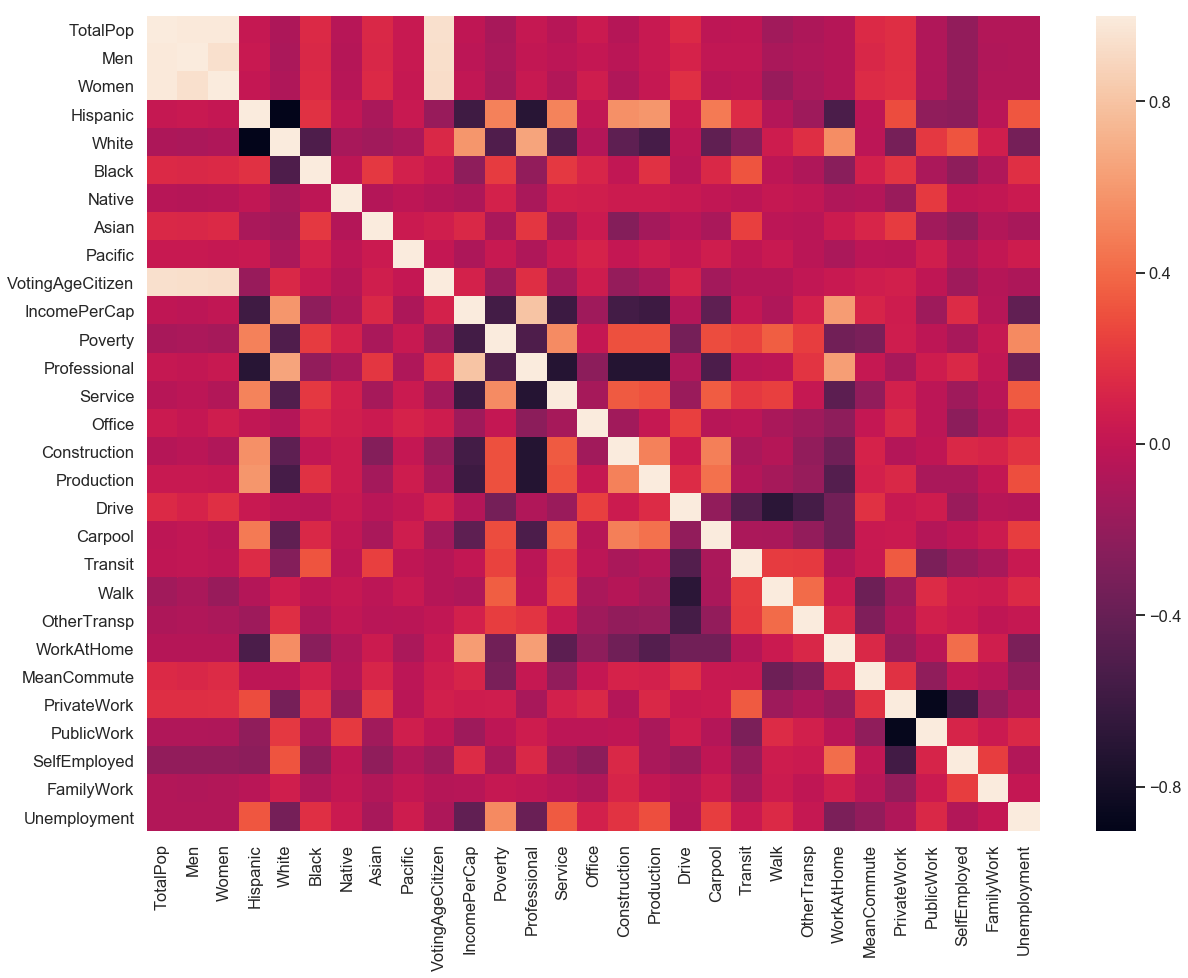

In [12]:
# Correlation heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
corr = co_clean.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,)

In [13]:
top25_corr_pos = co_clean.corr().unstack().sort_values(ascending=False).drop_duplicates()
top25_corr_pos.head(25)

Unemployment      Unemployment        1.000000
TotalPop          Men                 0.986987
                  Women               0.986699
Women             Men                 0.947720
TotalPop          VotingAgeCitizen    0.942332
VotingAgeCitizen  Men                 0.933733
Women             VotingAgeCitizen    0.926094
IncomePerCap      Professional        0.800499
Professional      White               0.652149
                  WorkAtHome          0.622649
IncomePerCap      WorkAtHome          0.615145
Production        Hispanic            0.587658
White             IncomePerCap        0.584173
Hispanic          Construction        0.562761
WorkAtHome        White               0.548174
Service           Poverty             0.544672
Unemployment      Poverty             0.537699
Hispanic          Service             0.505259
Poverty           Hispanic            0.501506
Production        Construction        0.497749
Carpool           Construction        0.487523
Hispanic     

This is the top 25 postive correlations. 

Going to drop some features. Men and Women has high correlation with each other because they're about 50 percent of the population. Also they have correlations with Total Population. This will remove the multicollinearity between the features.

In [14]:
co_clean = co_clean.drop(['Men', "Women"], axis=1)

In [15]:
top25_corr_pos = co_clean.corr().unstack().sort_values(ascending=False).drop_duplicates()
top25_corr_pos.head(25)

Unemployment      Unemployment    1.000000
VotingAgeCitizen  TotalPop        0.942332
IncomePerCap      Professional    0.800499
Professional      White           0.652149
                  WorkAtHome      0.622649
WorkAtHome        IncomePerCap    0.615145
Production        Hispanic        0.587658
IncomePerCap      White           0.584173
Construction      Hispanic        0.562761
WorkAtHome        White           0.548174
Service           Poverty         0.544672
Poverty           Unemployment    0.537699
Hispanic          Service         0.505259
Poverty           Hispanic        0.501506
Production        Construction    0.497749
Construction      Carpool         0.487523
Hispanic          Carpool         0.466500
Production        Carpool         0.431070
WorkAtHome        SelfEmployed    0.414671
Walk              OtherTransp     0.405327
                  Poverty         0.360360
Carpool           Service         0.350753
Construction      Service         0.344276
Service    

This is new top positive correlations

In [16]:
top25_corr_neg = co_clean.corr().unstack().sort_values().drop_duplicates()
top25_corr_neg.head(25)

White         Hispanic       -0.903907
PublicWork    PrivateWork    -0.876782
Professional  Production     -0.723187
              Construction   -0.721367
Service       Professional   -0.716986
Hispanic      Professional   -0.696473
Walk          Drive          -0.686469
IncomePerCap  Service        -0.599905
Production    IncomePerCap   -0.591741
Hispanic      IncomePerCap   -0.589015
PrivateWork   SelfEmployed   -0.569516
IncomePerCap  Construction   -0.568182
Poverty       IncomePerCap   -0.562750
Drive         OtherTransp    -0.560191
Production    White          -0.550598
Hispanic      WorkAtHome     -0.527516
Professional  Carpool        -0.519141
Poverty       Professional   -0.517151
White         Black          -0.517110
Poverty       White          -0.507205
Service       White          -0.499547
Transit       Drive          -0.490986
Production    WorkAtHome     -0.483557
Service       WorkAtHome     -0.447924
White         Construction   -0.442771
dtype: float64

This is the top 25 negative correlations

# Categories of Features

In [17]:
columns = list(co_clean.columns)
columns

['TotalPop',
 'Hispanic',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific',
 'VotingAgeCitizen',
 'IncomePerCap',
 'Poverty',
 'Professional',
 'Service',
 'Office',
 'Construction',
 'Production',
 'Drive',
 'Carpool',
 'Transit',
 'Walk',
 'OtherTransp',
 'WorkAtHome',
 'MeanCommute',
 'PrivateWork',
 'PublicWork',
 'SelfEmployed',
 'FamilyWork',
 'Unemployment']

In [18]:
ethnicity = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
ethnicity

['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

Text(0.5, 1.0, 'Ethnicity in Colorado')

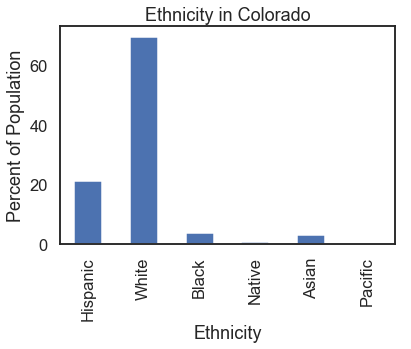

In [19]:
race_plot = co_clean[ethnicity].mean().plot(kind="bar")
plt.ylabel('Percent of Population')
plt.xlabel('Ethnicity')
plt.title('Ethnicity in Colorado')

The majority of Colorado is white and the second biggest group is hispanic.

In [20]:
co_clean[ethnicity].mean()

Hispanic    21.080632
White       69.531929
Black        3.438574
Native       0.574554
Asian        2.780713
Pacific      0.128120
dtype: float64

Text(0.5, 0, 'Dollars')

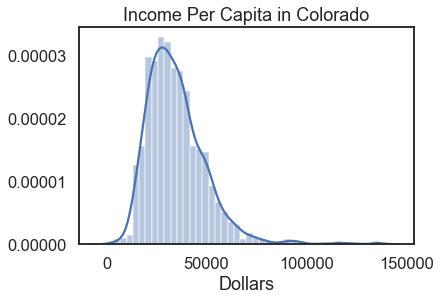

In [21]:
# distribution of income per capita
sns.distplot(co_clean['IncomePerCap'])
plt.title('Income Per Capita in Colorado')
plt.xlabel('Dollars')

In [22]:
co_clean['IncomePerCap'].mean()

35016.239059967585

This is the mean for Income per Capita in Colorado.

It looks like income per capita is not normally distributed.

In [23]:
co_clean['Poverty'].mean()

12.15761750405187

This is the average poverty level for Colorado. Census use forumlas to determine poverty level. (https://www.census.gov/topics/income-poverty/poverty/guidance/poverty-measures.html)

In [24]:
co_clean['Unemployment'].mean()

5.4866288492706685

In [25]:
co_clean['VotingAgeCitizen'].mean()/ co_clean['TotalPop'].mean()

0.7153370912924165

About 72 percent of Colorado are at least 18 plus.

Text(0.5, 1.0, 'Industry Distribution in Colorado')

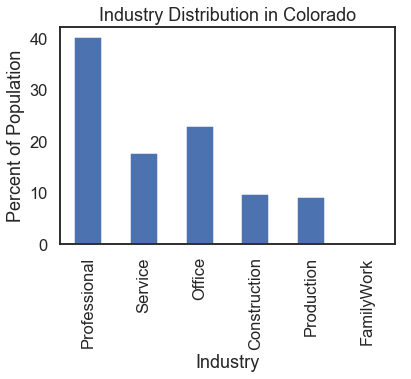

In [26]:
industry_list = ['Professional','Service','Office','Construction','Production', 'FamilyWork']
industry_plot = co_clean[industry_list].mean().plot(kind="bar")
plt.ylabel('Percent of Population')
plt.xlabel('Industry')
plt.title('Industry Distribution in Colorado')

In [27]:
co_clean[industry_list].mean()

Professional    40.297407
Service         17.704862
Office          22.952026
Construction     9.807293
Production       9.241491
FamilyWork       0.200000
dtype: float64

Text(0.5, 1.0, 'Transportation in Colorado')

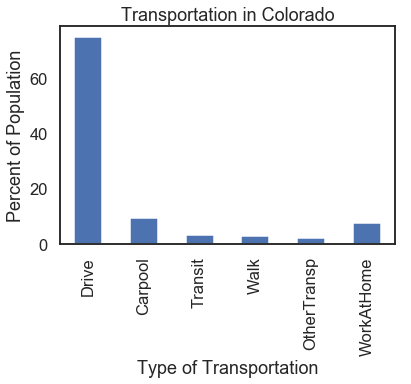

In [28]:
transportation_list = ['Drive','Carpool','Transit','Walk','OtherTransp','WorkAtHome']
transportation_plot = co_clean[transportation_list].mean().plot(kind="bar")
plt.ylabel('Percent of Population')
plt.xlabel('Type of Transportation')
plt.title('Transportation in Colorado')

In [29]:
co_clean[transportation_list].mean()

Drive          75.026337
Carpool         9.360616
Transit         3.045543
Walk            2.912156
OtherTransp     2.269125
WorkAtHome      7.388493
dtype: float64

Owning a car is very important in Colorado to get to work. About 75 % of people just drive.

# Start to Cluster

In [30]:
# declare features
X = co_clean
# # standardize them



scaler = StandardScaler()
X_std = scaler.fit_transform(X)

C:\Users\ninja\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ninja\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


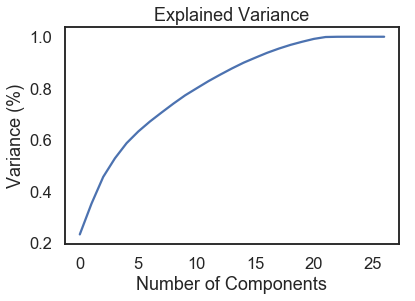

In [31]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_std)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

Around 20 components explain most of the variance.

In [32]:
# select amount of components to keep
X_pca = PCA(20).fit_transform(X_std)

K means: Find optimal k value

By using the 'elbow graph' method we can identify the best k value to balance the effectiveness between the extremes of 1 cluster and a cluster for each data point. We use the inertia as our metric for the coherency of each cluster. It is calculated using within-cluster sum-of-squares

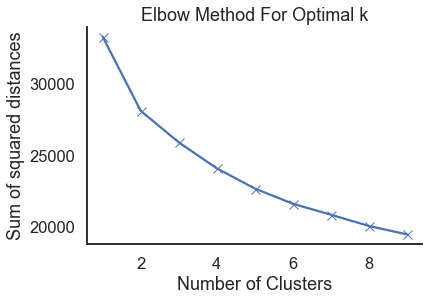

In [33]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, random_state = 7)
    km = km.fit(X_std)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
sns.despine()
plt.show()
    

Looks two clusters is the best. Silhouette score will give out more details.

In [34]:
### Finding optimal silhouette score

time_start = time.time()

for i in range(2,15):
    labels2 = KMeans(n_clusters = i, random_state = 7).fit_predict(X_std)
    print('Silhouette Score for {}-cluster K-Means: {}'.format(i, metrics.silhouette_score(X_std, labels2, metric='euclidean')))
    
print('Time for Silhouette Score Loop: {} seconds.'.format(time.time()-time_start))

Silhouette Score for 2-cluster K-Means: 0.1847353470870026
Silhouette Score for 3-cluster K-Means: 0.16968600645028173
Silhouette Score for 4-cluster K-Means: 0.14251992272741462
Silhouette Score for 5-cluster K-Means: 0.10494057542429999
Silhouette Score for 6-cluster K-Means: 0.10526111095011366
Silhouette Score for 7-cluster K-Means: 0.10580461711133503
Silhouette Score for 8-cluster K-Means: 0.09784716872474448
Silhouette Score for 9-cluster K-Means: 0.10124698064403709
Silhouette Score for 10-cluster K-Means: 0.10332558210495218
Silhouette Score for 11-cluster K-Means: 0.07520812186321553
Silhouette Score for 12-cluster K-Means: 0.08665369029456253
Silhouette Score for 13-cluster K-Means: 0.08757684740917887
Silhouette Score for 14-cluster K-Means: 0.08375473588950678
Time for Silhouette Score Loop: 1.772085428237915 seconds.


After calculating Silhouette Scores for a range of K values to find an optimal number of clusters, the best solution is two. The score is .185, which indicates that it is mostly a random cluster than not.

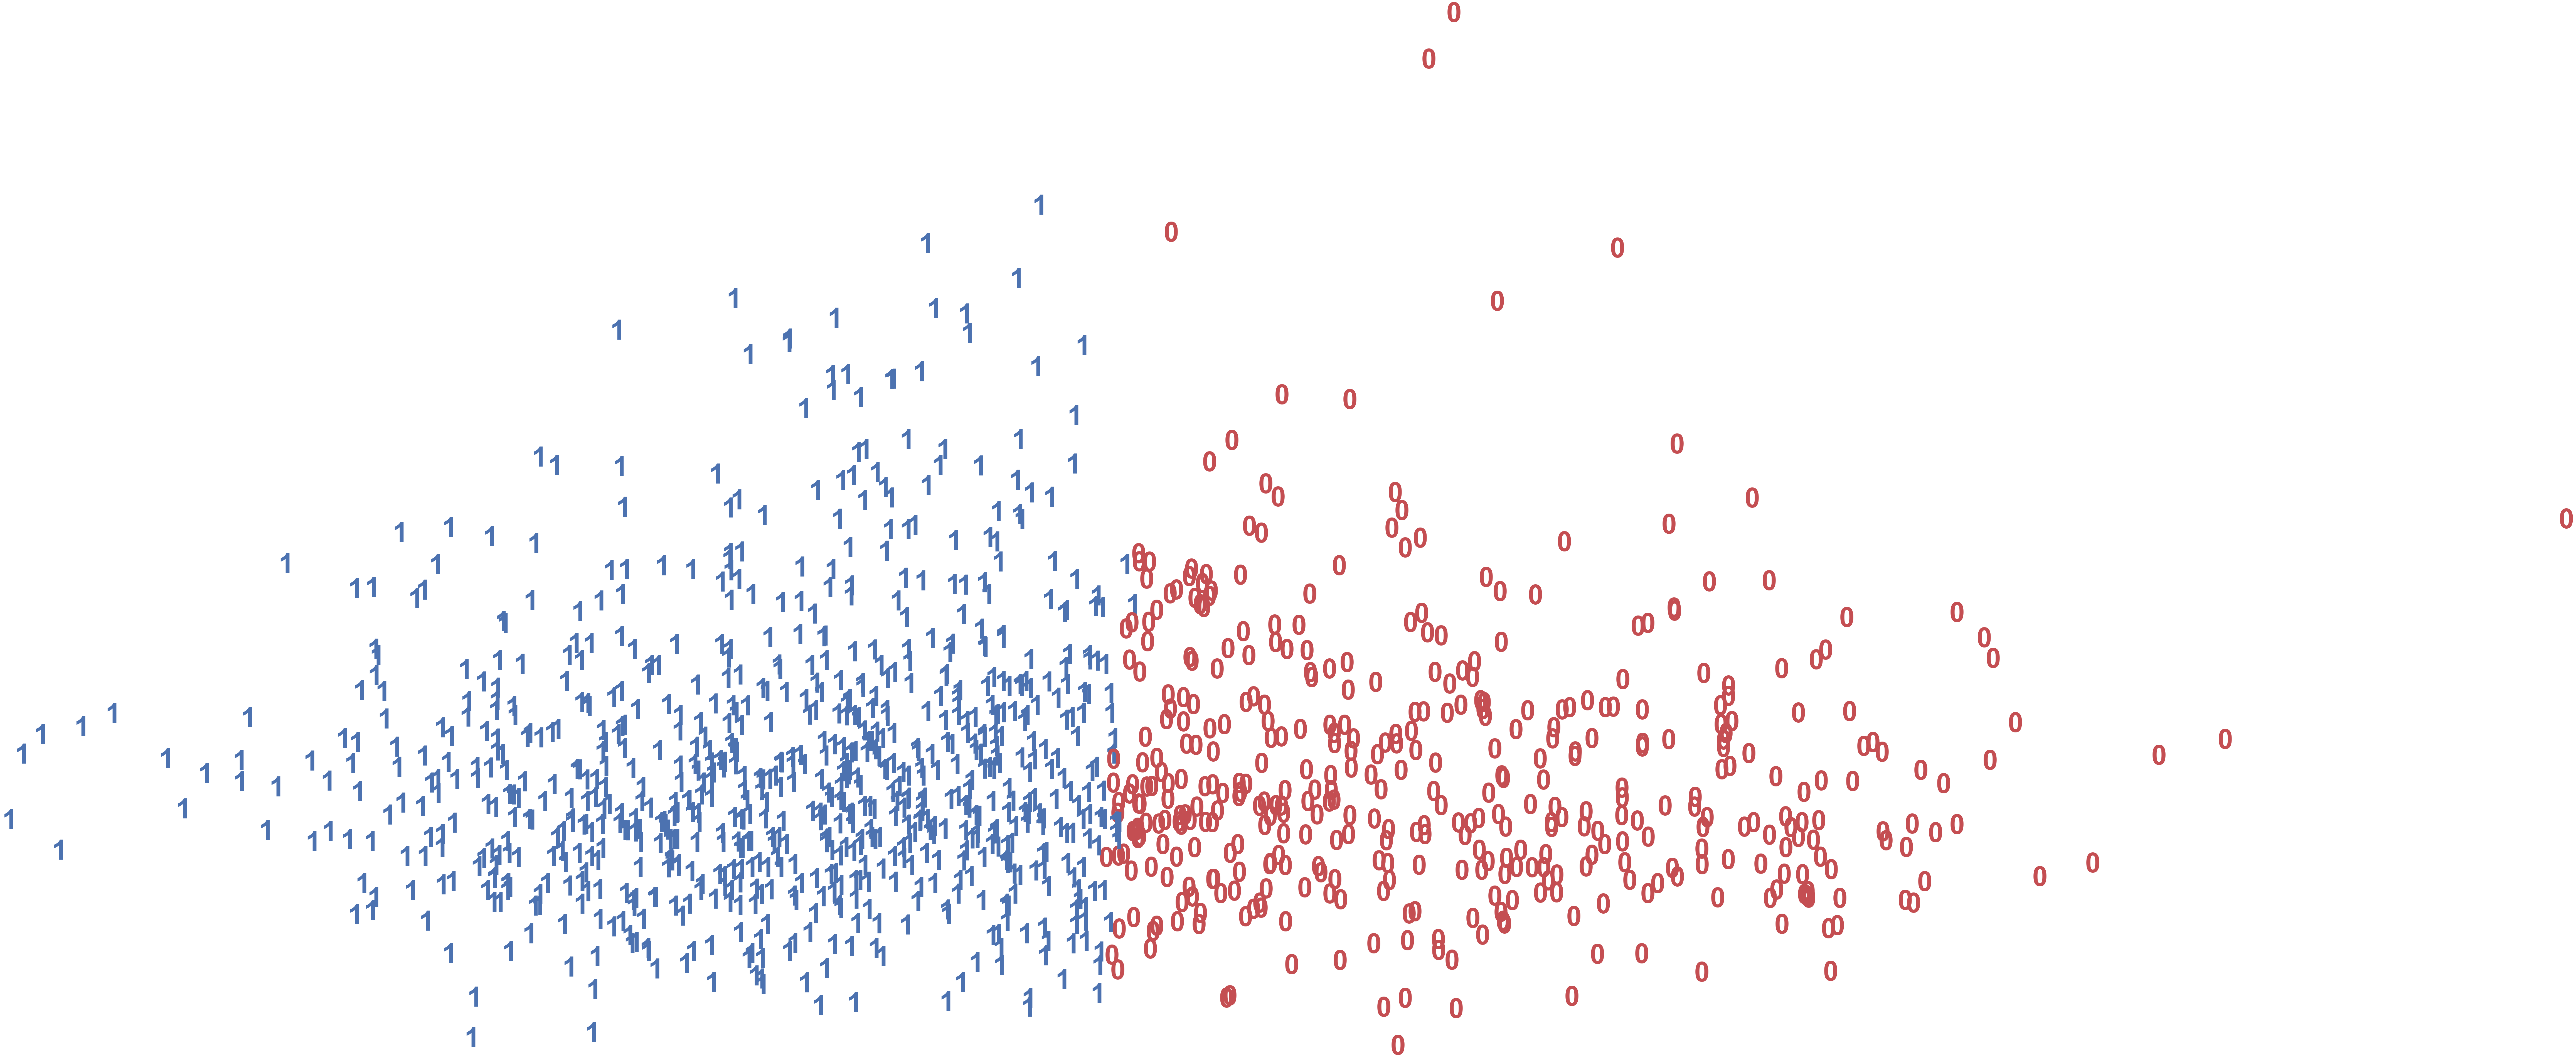

Time for Plot: 4.039668083190918 seconds.


In [35]:
time_start = time.time()

labels = KMeans(n_clusters = 2, random_state = 7).fit_predict(X_std)

pca = PCA(n_components=20).fit_transform(X_std)


plt.figure(figsize = (10,5))
colors = 'rb'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(labels[i]),
             color = colors[labels[i]],
             fontdict = {'weight': 'bold', 'size': 100}
            )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print('Time for Plot: {} seconds.'.format(time.time()-time_start))

Using PCA to reduce the data to two dimensions, we can see two clusters are separated fairly well with little overlap between them.

# UMAP

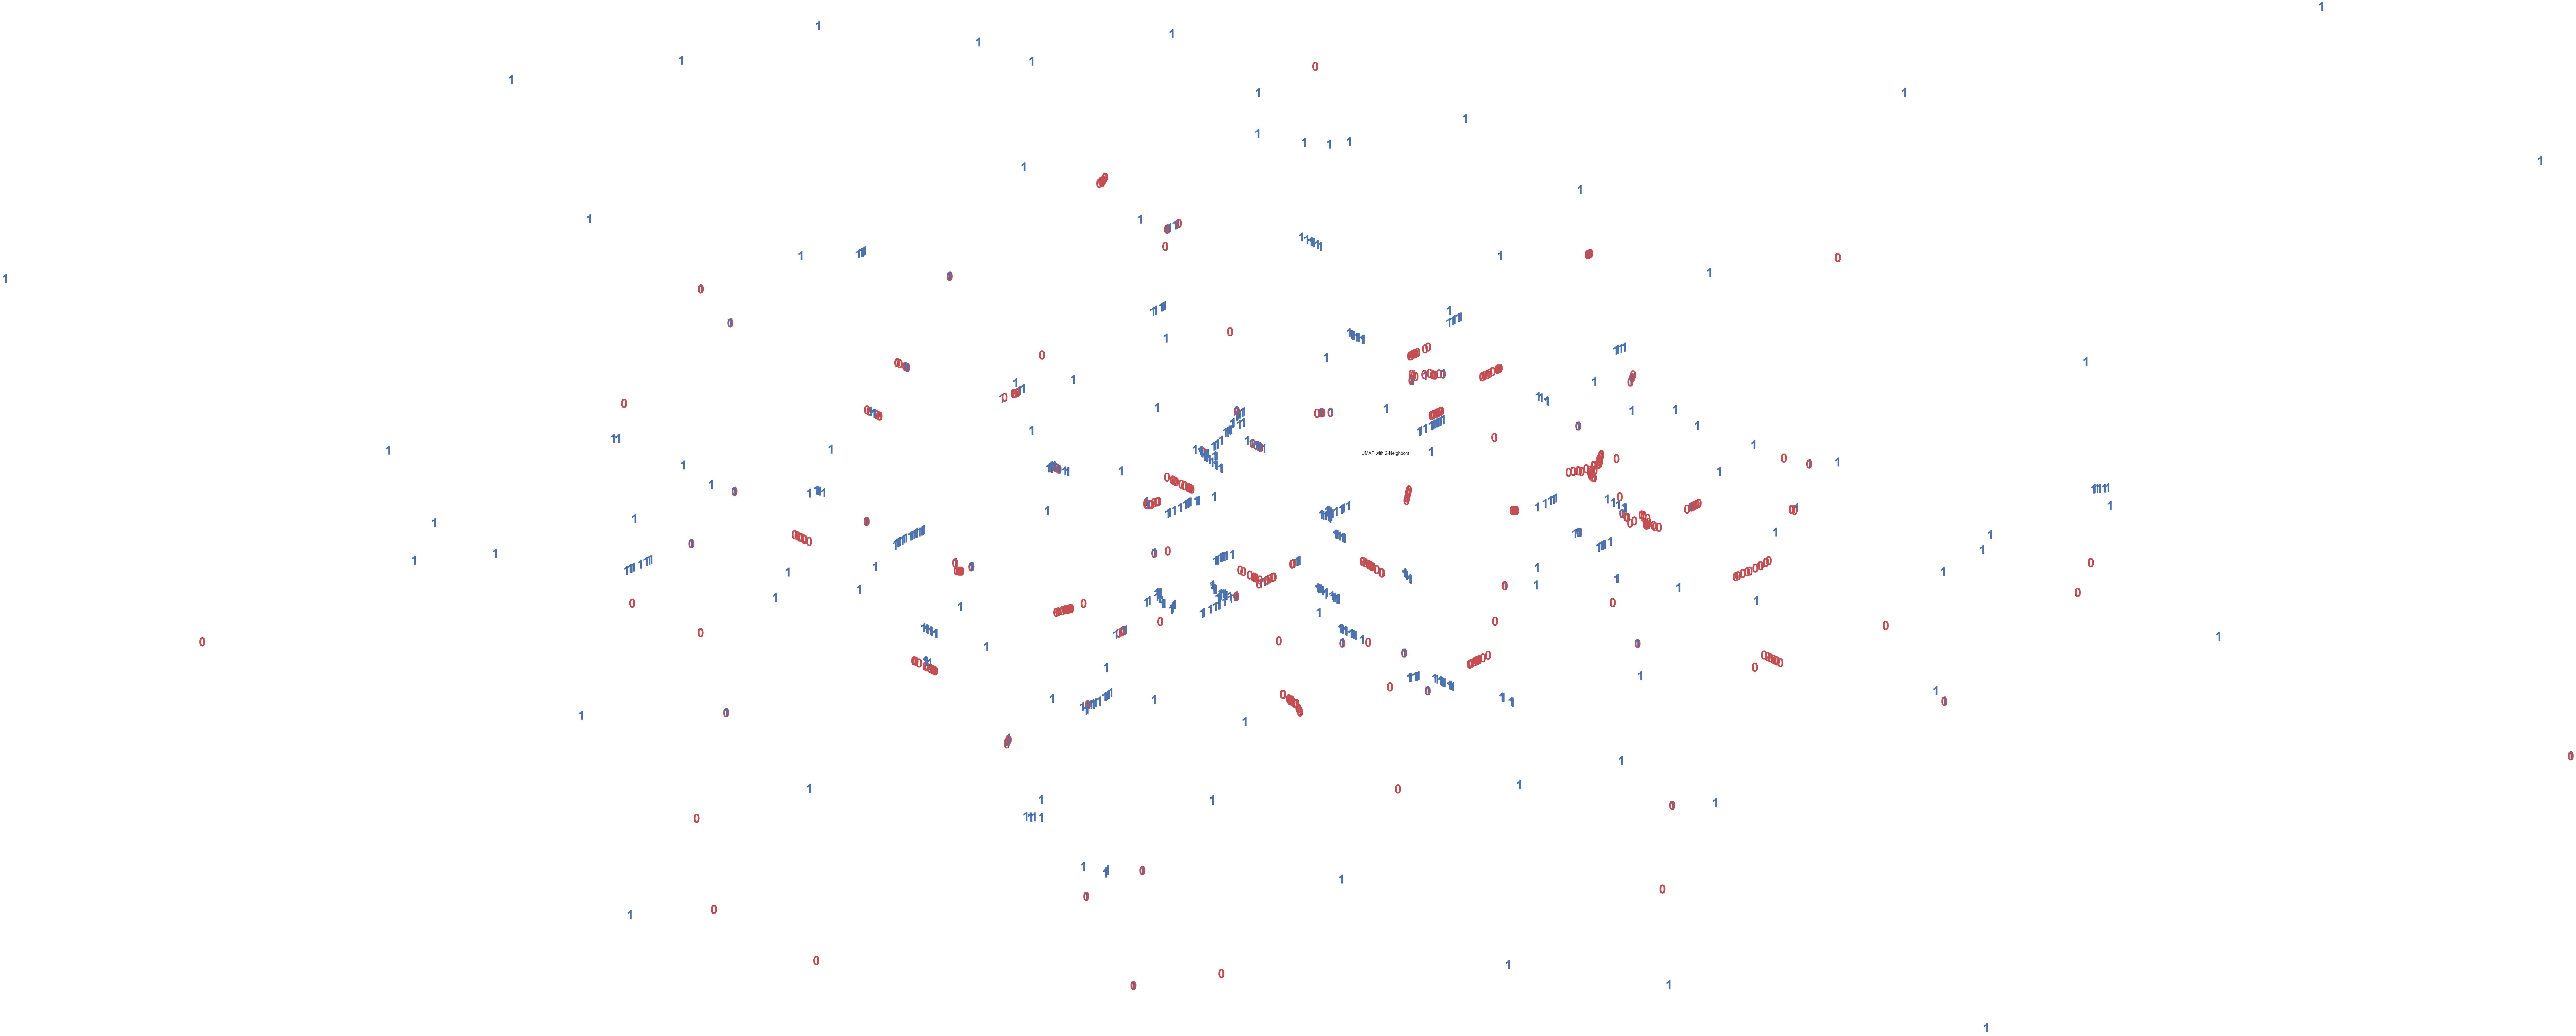

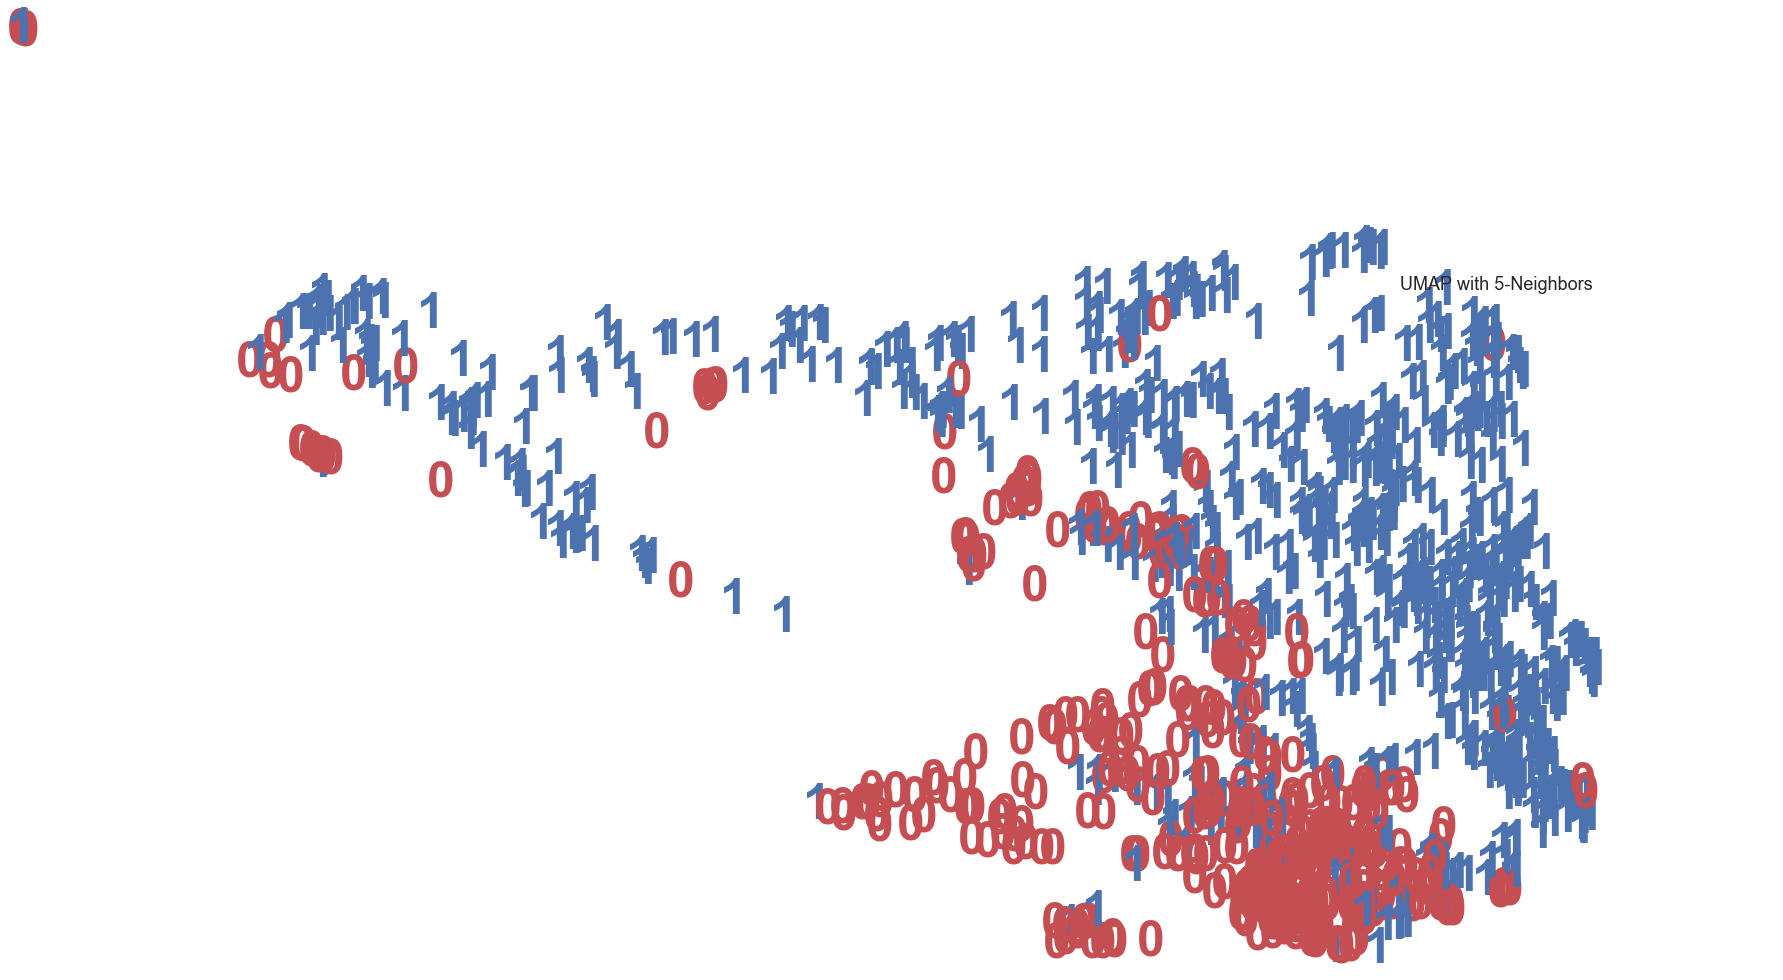

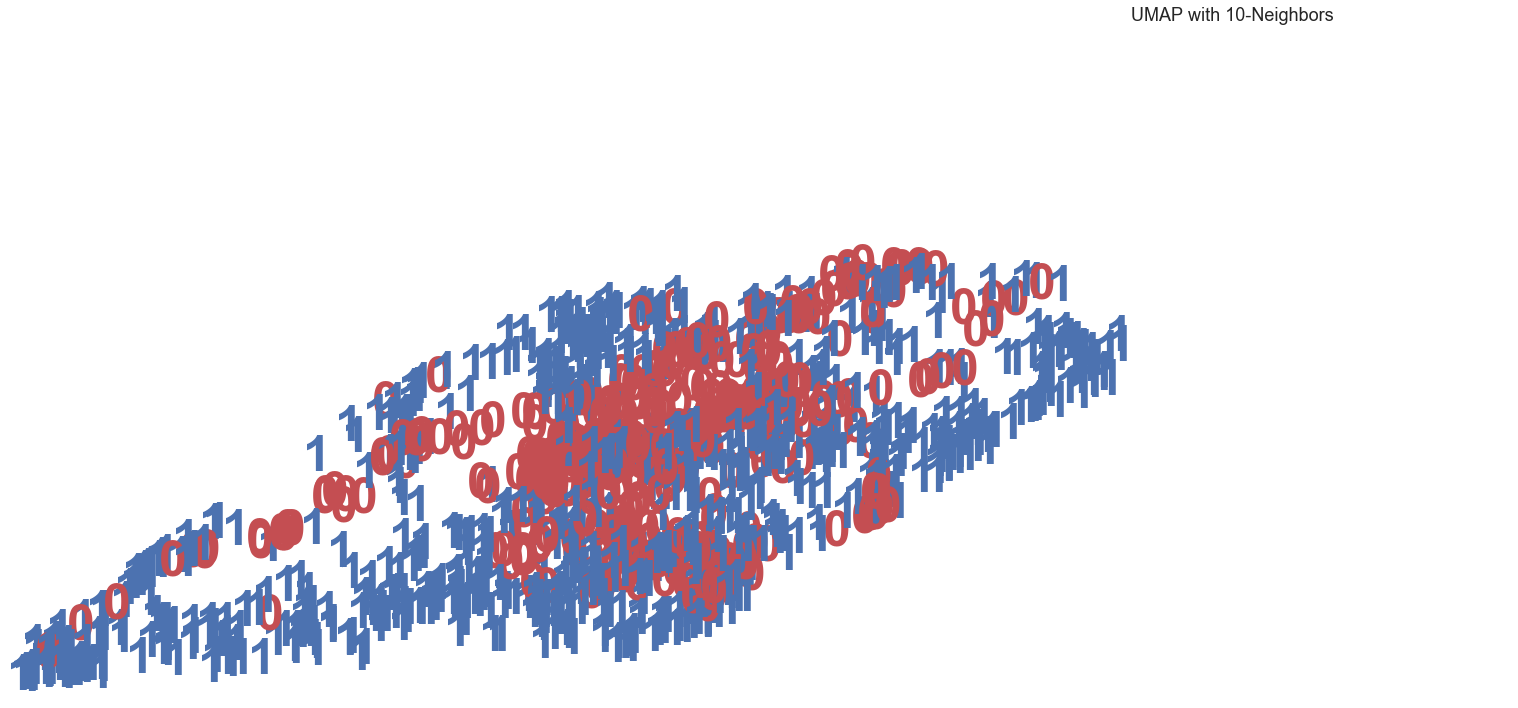

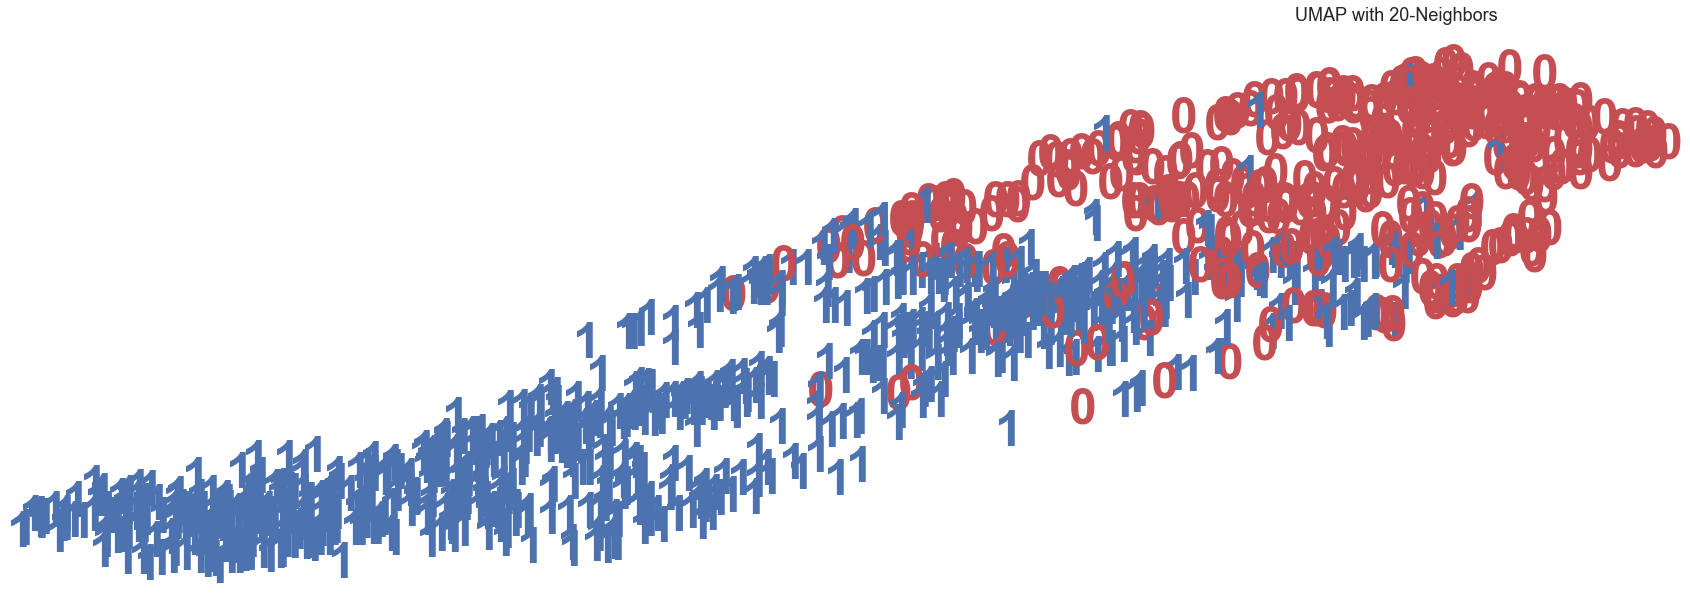

Time for Plots: 27.08946466445923 seconds.


In [36]:
# time_start = time.time()

for n in (2, 5, 10, 20):
    umap_results = umap.UMAP(n_neighbors=n,
                             min_dist=0.1,
                             n_components = 20,
                             metric='correlation', init = 'random').fit_transform(X_std)
    
    plt.figure(figsize=(10,5))
    colours = ["r","b"]
    for i in range(umap_results.shape[0]):
        plt.text(umap_results[i, 0], umap_results[i, 1], labels[i],
                 color=colours[int(labels[i])],
                 fontdict={'weight': 'bold', 'size': 50}
                )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title('UMAP with {}-Neighbors'.format(n))
    plt.show()

print('Time for Plots: {} seconds.'.format(time.time()-time_start))

U-Map did a worse job plotting data intwo domensions than K-Means

# GMM

In [37]:
time_start = time.time()
covariance = ['full', 'diag', 'tied', 'spherical']

for type in covariance:
    for i in range(2,14):
        # Defining the agglomerative clustering
        gmm_cluster = GaussianMixture(n_components=i, covariance_type = type, random_state=7)
         # Fit model
        clusters = gmm_cluster.fit_predict(X_std)
        print('Silhouette Score for {}-cluster GMM, {} Covariance: {}'.format(i, type, metrics.silhouette_score(X_std, clusters, metric='euclidean')))
    
print('Time for GMM {} Silhouette Score Loop: {} seconds.'.format(i, time.time()-time_start))

Silhouette Score for 2-cluster GMM, full Covariance: 0.08396321354734082
Silhouette Score for 3-cluster GMM, full Covariance: 0.07446431977387169
Silhouette Score for 4-cluster GMM, full Covariance: 0.07267482620637905
Silhouette Score for 5-cluster GMM, full Covariance: 0.0657368101980662
Silhouette Score for 6-cluster GMM, full Covariance: 0.002748869140861594
Silhouette Score for 7-cluster GMM, full Covariance: 0.009822244190222495
Silhouette Score for 8-cluster GMM, full Covariance: 0.04155349893241994
Silhouette Score for 9-cluster GMM, full Covariance: 0.021462477452329636
Silhouette Score for 10-cluster GMM, full Covariance: 0.019210284161396227
Silhouette Score for 11-cluster GMM, full Covariance: -0.002786460472151463
Silhouette Score for 12-cluster GMM, full Covariance: 0.021033593942923826
Silhouette Score for 13-cluster GMM, full Covariance: 0.0024414425444745412
Silhouette Score for 2-cluster GMM, diag Covariance: 0.15659361965700777
Silhouette Score for 3-cluster GMM, dia

Two cluster tied Covariance has the best score of .215

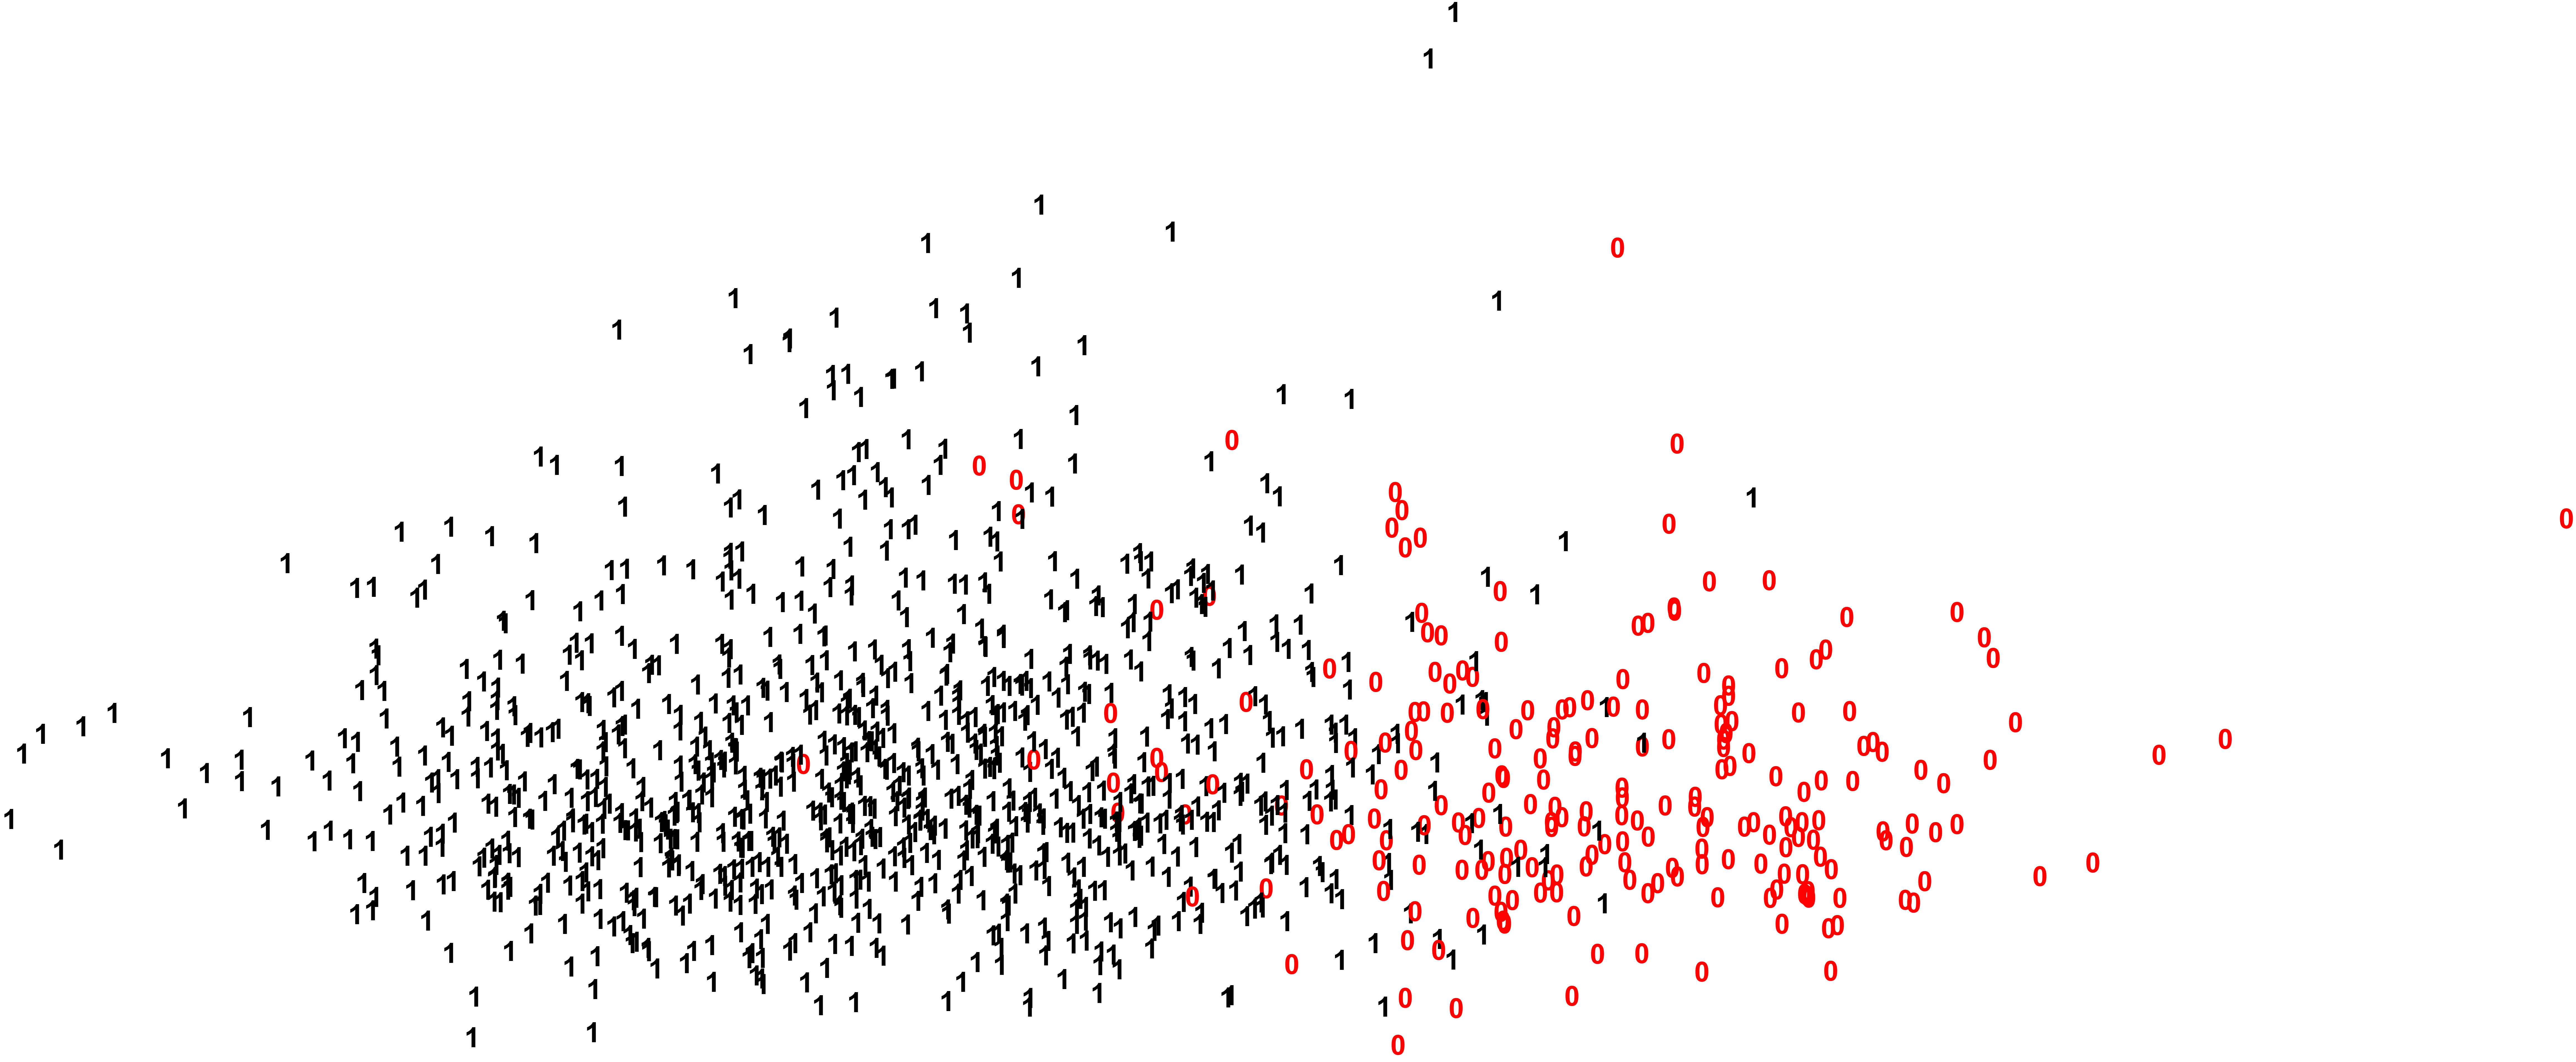

Time for Plot: 3.896348714828491 seconds.


In [38]:
time_start = time.time()

gmm_cluster = GaussianMixture(n_components=2, covariance_type = 'tied', random_state=7)
# Fit model
clusters = gmm_cluster.fit_predict(X_std)

pca = PCA(n_components=20).fit_transform(X_std)

plt.figure(figsize = (10,5))
colors = ['red', 'black']
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color = colors[clusters[i]],
             fontdict = {'weight': 'bold', 'size': 100}
            )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print('Time for Plot: {} seconds.'.format(time.time()-time_start))

Shows the two cluster overlap each other but there is disinct separtation.

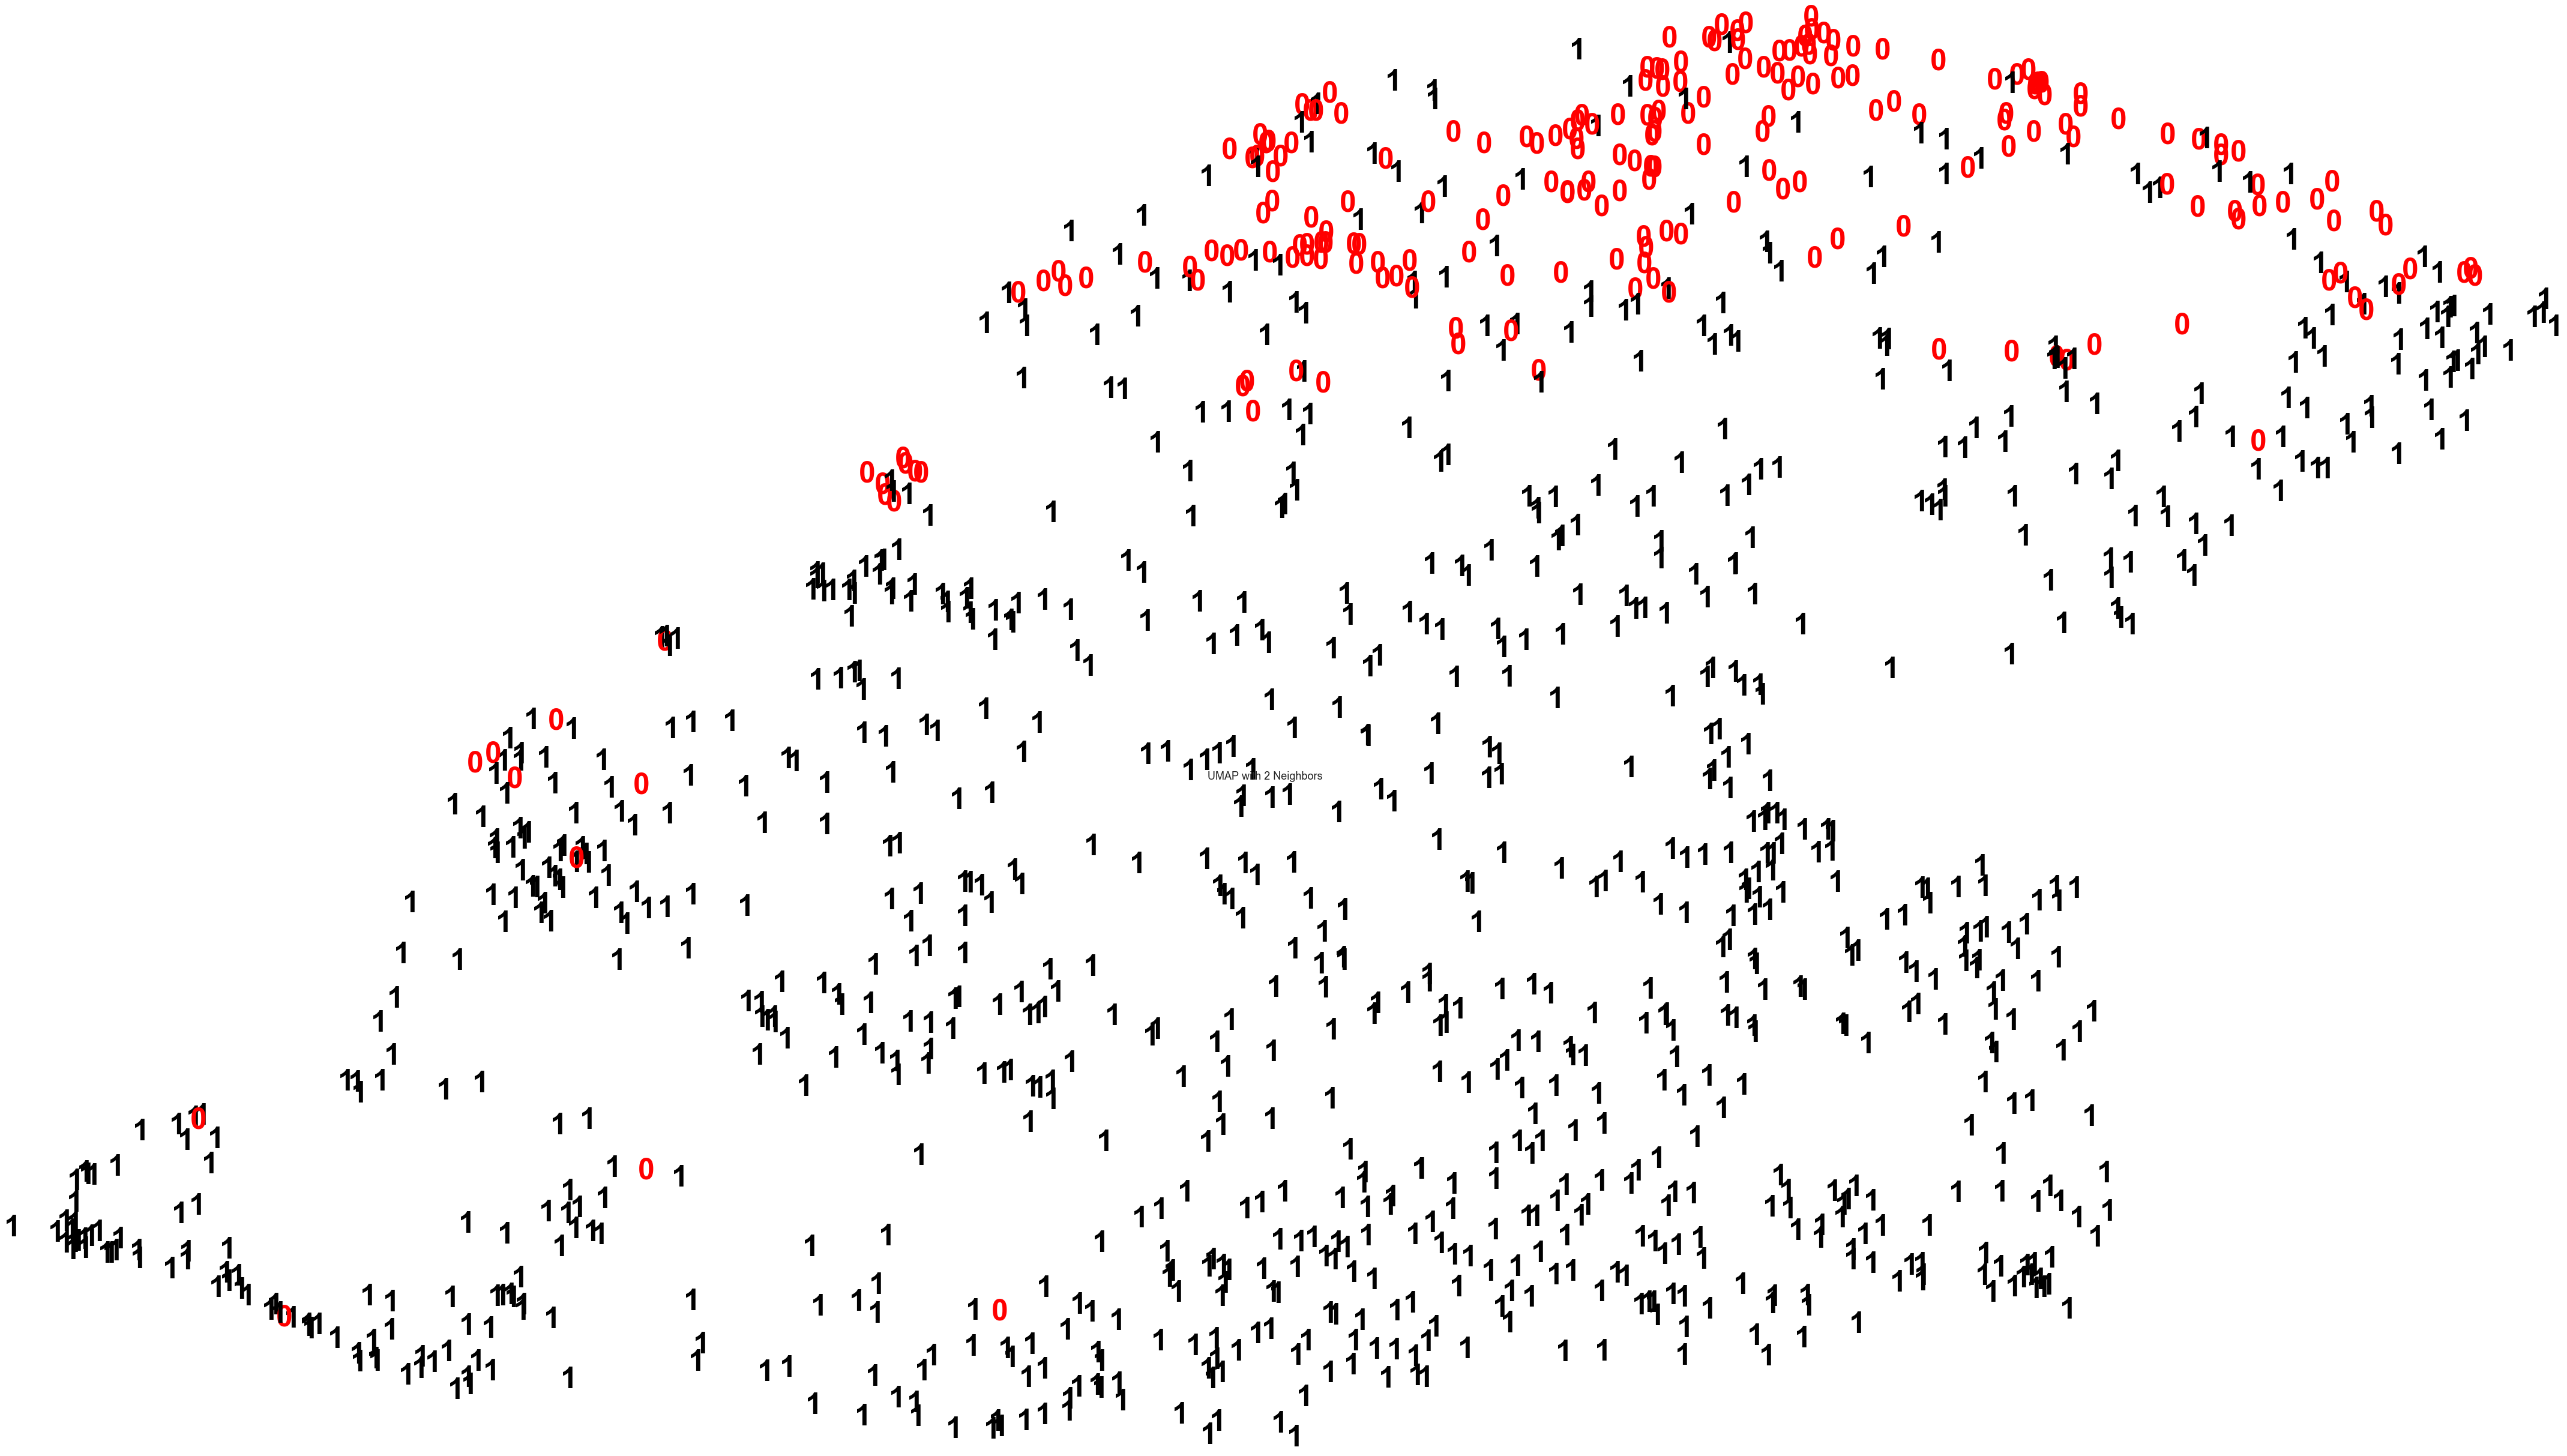

Time for Plots: 4.9972984790802 seconds.


In [39]:

time_start = time.time()


umap_results = umap.UMAP(n_neighbors=n,
                         min_dist=0.1,
                         n_components = 2,
                         metric='correlation', init = 'random').fit_transform(X_std)
    
plt.figure(figsize=(10,5))
colours = ['red', 'black']
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], clusters[i],
             color=colours[int(clusters[i])],
             fontdict={'weight': 'bold', 'size': 50}
                )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('UMAP with 2 Neighbors')
plt.show()

print('Time for Plots: {} seconds.'.format(time.time()-time_start))

See some overlapping but two see distinct clusters from U-Map

# GMM is the Best Model

We tested two clustering algorithms to see how well they could group the data, with Silhouette Scores as the evaluating metric. K-Means with a 2 cluster solution achieved the  score,.185 and Gaussian Mixture Models with an 2-cluster solution with a tied covariance type had a .215. 

# Exploring the Clusters

What is left unanswered is what these clusters represent. In this section, I will run the two cluster GMM on the whole dataset, add the cluster labels to it, and examine each group in more detail. My predictions on the cluster are separated mostly from income and race. 

In [40]:
X = co_clean

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

C:\Users\ninja\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ninja\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [41]:
gmm_cluster = GaussianMixture(n_components=2, covariance_type = 'tied', random_state=7)
# Fit model
gmm_labels = gmm_cluster.fit_predict(X_std)

In [42]:
co_clean['gmm_labels'] = gmm_labels

In [43]:
gmm_cluster_zero = co_clean.loc[co_clean['gmm_labels'] == 0]
gmm_cluster_one = co_clean.loc[co_clean['gmm_labels'] == 1]

In [44]:
gmm_cluster_one.shape

(1012, 28)

In [45]:
gmm_cluster_zero.shape

(222, 28)

In [46]:
# group by cluster and take the mean for each column
gmm_co_grouped = co_clean.groupby(['gmm_labels']).mean()

In [47]:
gmm_co_grouped

,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,IncomePerCap,Poverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
gmm_labels,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4396.554054,52.495495,35.445946,6.637838,1.007658,2.254955,0.246396,2568.936937,20822.72973,21.862613,23.197297,24.347297,22.086486,15.528829,14.840991,73.789640,14.065315,4.410811,2.392342,1.575225,3.759009,24.891892,83.327928,10.982432,5.463514,0.218919,7.767117
1,4388.954545,14.189229,77.009289,2.736759,0.479545,2.896047,0.102174,3265.955534,38129.83498,10.028656,44.048617,16.247727,23.141897,8.552174,8.013142,75.297628,8.328557,2.746047,3.026186,2.421344,8.184684,24.848518,78.212846,14.640020,6.949704,0.195850,4.986364


Text(0.5, 1.0, 'Ethnicity in Colorado for CLuster 0')

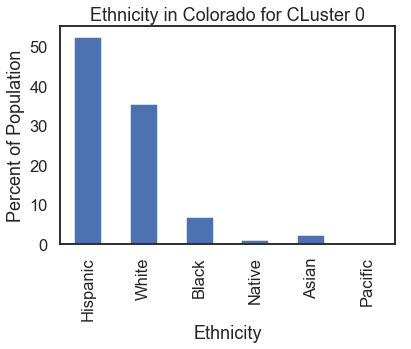

In [48]:
race_plot = gmm_cluster_zero[ethnicity].mean().plot(kind="bar")
plt.ylabel('Percent of Population')
plt.xlabel('Ethnicity')
plt.title('Ethnicity in Colorado for CLuster 0')

Text(0.5, 1.0, 'Ethnicity in Colorado for CLuster 1')

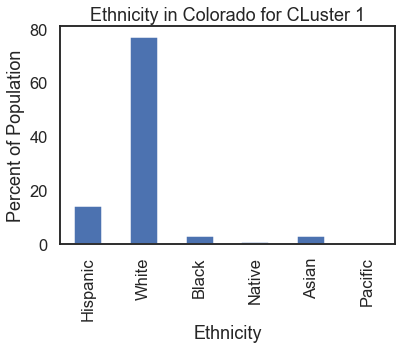

In [49]:
race_plot = gmm_cluster_one[ethnicity].mean().plot(kind="bar")
plt.ylabel('Percent of Population')
plt.xlabel('Ethnicity')
plt.title('Ethnicity in Colorado for CLuster 1')

Cluster 0 has more percentage of Hispanic and Black for ethnicity than cluster 1. The other races are too small of a difference to make a note of.

Text(0.5, 1.0, 'Industry Distribution in Colorado for CLuster 0')

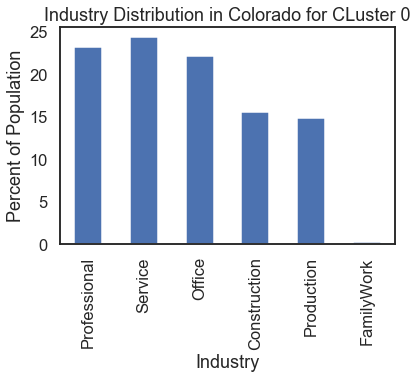

In [50]:
industry_list = ['Professional','Service','Office','Construction','Production', 'FamilyWork']
industry_plot = gmm_cluster_zero[industry_list].mean().plot(kind="bar")
plt.ylabel('Percent of Population')
plt.xlabel('Industry')
plt.title('Industry Distribution in Colorado for CLuster 0')

Text(0.5, 1.0, 'Industry Distribution in Colorado for CLuster 1')

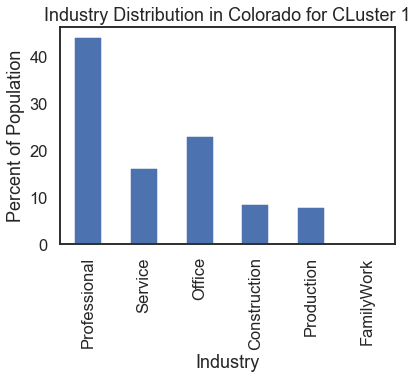

In [51]:
industry_list = ['Professional','Service','Office','Construction','Production', 'FamilyWork']
industry_plot = gmm_cluster_one[industry_list].mean().plot(kind="bar")
plt.ylabel('Percent of Population')
plt.xlabel('Industry')
plt.title('Industry Distribution in Colorado for CLuster 1')

Cluster 0's demographic does more labour jobs than cluster 1

Text(0.5, 1.0, 'Transportation in Colorado for cluster one')

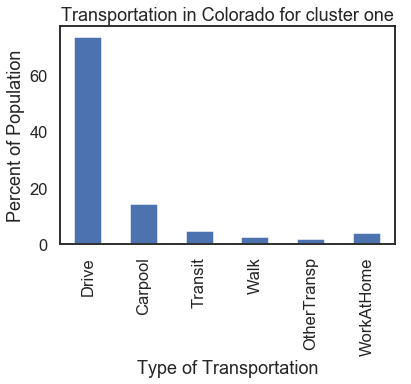

In [54]:
transportation_list = ['Drive','Carpool','Transit','Walk','OtherTransp','WorkAtHome']
transportation_plot = gmm_cluster_zero[transportation_list].mean().plot(kind="bar")
plt.ylabel('Percent of Population')
plt.xlabel('Type of Transportation')
plt.title('Transportation in Colorado for cluster one')

Text(0.5, 1.0, 'Transportation in Colorado for CLuster 1')

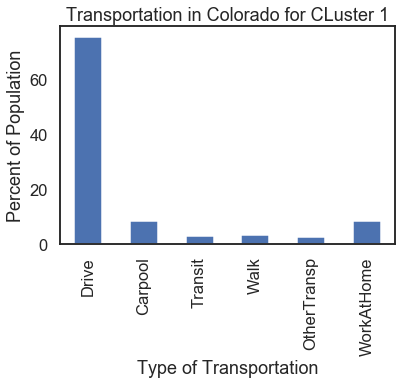

In [53]:
transportation_list = ['Drive','Carpool','Transit','Walk','OtherTransp','WorkAtHome']
transportation_plot = gmm_cluster_one[transportation_list].mean().plot(kind="bar")
plt.ylabel('Percent of Population')
plt.xlabel('Type of Transportation')
plt.title('Transportation in Colorado for CLuster 1')

The type of transporatation is about the same for drive for both clusters. Cluster 0 has more carpool but cluster 1 has more work at home. 


Text(0.5, 0, 'Dollars')

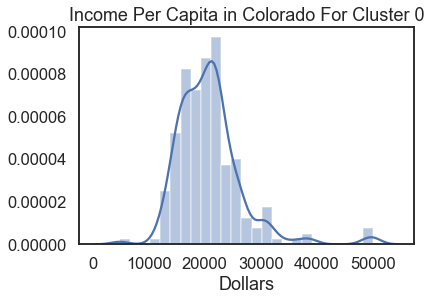

In [55]:
# distribution of income per capita
sns.distplot(gmm_cluster_zero['IncomePerCap'])
plt.title('Income Per Capita in Colorado For Cluster 0')
plt.xlabel('Dollars')

Text(0.5, 0, 'Dollars')

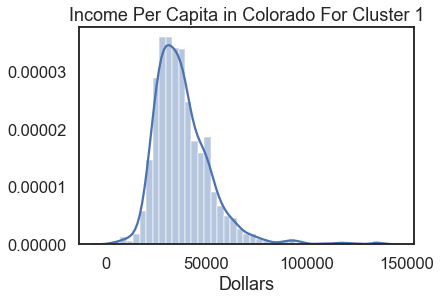

In [56]:
# distribution of income per capita
sns.distplot(gmm_cluster_one['IncomePerCap'])
plt.title('Income Per Capita in Colorado For Cluster 1')
plt.xlabel('Dollars')

In [57]:
gmm_cluster_one['IncomePerCap'].mean() - gmm_cluster_zero['IncomePerCap'].mean()

17307.105250507422

There's a $17307 differences between for cluster one and cluster 0. 

Cluster 1 differs from cluster 0 in every catergory other than transportation. 

This model would benefit a marketing team and use this information to market what kind of proudcts. The only similarity between the clusters seems like transportation would the best product to market to everyone. Also any elections would use this data to see any problems and make some kind of laws to address the problems especially the poverty percentage for cluster 0. It's 20@.

# Shortcomings

The one thing I didn't look at any outliers. The reason I didn't because the US Census use so much resources to gather the data. I feel like if I adjusted the data, the data would be skewed. I would go back and look at the outliers for each feature. Also I would research more if there was weather effect around that time. That would casue some people to move in or out of Colorado. Also the job market is a huge factor too. Overall, the data I received from the U.S Census doesn't tell the whole story what kind of people are in Colorado. I think it is  a good start. Couple survey questions like how long they live in Colorado and why you moved here would give us more insight on the popul